In [1]:
from completeness import *

import scipy.interpolate
import matplotlib.pyplot as plt

$\textbf{Here we present a small tool for recalculating Kepler's survey completeness for different subsamples of stars.}$

The transit survey completeness is the product of three components: the detection efficiency, vetting efficiency, and geometric transit probability. For our purposes, we calculate all three on a period-radius grid, which can be interpolated over for the completeness at any point in the domain (see example below).

# Introduction

The function ```get_completeness()``` takes many arguements, and can provide various returns. In the simplest state (with no arguements supplied), ```get_completeness()``` will return four items:
- The period array (x-axis) of the completeness grid
- The radius array (y-axis) of the completeness grid
- The 2D completeness grid
- The number of dwarf stars used in the sample

In [2]:
Pgrid, Rgrid, completeness, nstars = get_completeness()

/Users/galen/Desktop/Research/Completeness/vetting.py:123: RuntimeWarning: invalid value encountered in true_divide
  fscore_P= 1.* score_P / all_P
/Users/galen/Desktop/Research/Completeness/vetting.py:11: RuntimeWarning: invalid value encountered in power
  bpl= a* (x/b)**np.where(x<b, c, d) * (y/e)**np.where(y<e, f,g)
/Users/galen/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


To visualize the computed survey completeness grid, we can use ```plt.contourf()```:

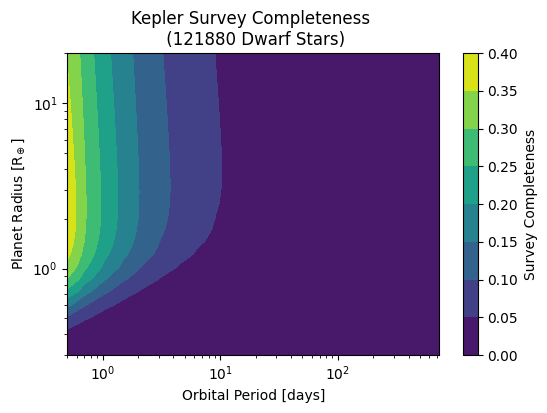

In [3]:
# Example: Plot the survey completeness in the P-R plane
plt.figure(dpi=100)
plt.title('Kepler Survey Completeness \n ({} Dwarf Stars)'.format(nstars))
plt.contourf(Pgrid, Rgrid, completeness.T, cmap='viridis')
plt.colorbar(label='Survey Completeness')
plt.xlabel('Orbital Period [days]')
plt.ylabel('Planet Radius [R$_\oplus$]')
plt.xscale('log')
plt.yscale('log')

To evaluate the completeness of points not directly on the P-R grid, we can use ```scipy.interpolate.interp2d()```:

In [4]:
# Example: use scipy to make an interpolation of completeness anywhere on the grid
interp_completeness = scipy.interpolate.interp2d(Pgrid, Rgrid, completeness.T) 
print('The survey completeness at [20 days, 5 Earth radii] is {:.2f}%'.format(100*interp_completeness(20,5)[0]))

The survey completeness at [20 days, 5 Earth radii] is 3.15%


# Calculating survey completeness in a bin of stellar properties
The stellar properties used here are those of the Gaia-Kepler Stellar Properties Catalog via [Berger et al. (2020a)](https://ui.adsabs.harvard.edu/abs/2020AJ....159..280B/abstract). Please refer to their work for details on parameters and their origins (especially regarding age and metallicity).

To specify a stellar sample, users may define ranges of the properties within the table (e.g., evaluating the completeness for only FGK stars within $0.56 < M_* < 1.63 M_\odot$). The available stellar properties to sample by are:

| Stellar Parameter | Units | Catalog Column Name |
| --- | --- | ----------- |
| Mass | M$_\odot$ | 'Mass' |
| Teff | K | 'Teff' |
| logg | dex | 'logg' |
| Metallicity | | '[Fe/H] |
| Radius | R$_\odot$ | 'Rad' |
| Bulk density | log($\rho_\odot$)| 'rho' |
| Luminosity | log(L$_\odot$) | 'Lum' |
| Age | Gyr | 'Age' |
| Distance | pc | 'Dist' |

Users may specify as many (or as few) stellar properties to bin by as they want - the code also works with no ranges specified (i.e., the largest possible sample).

To add a parameter and range to limit by, users may add the desired parameter's column name (in the table above) and an array of $[min, max]$ to the ```ranges{}``` dict arguement of ```get_completeness()``` in the following format:
```ranges={'Name':[min,max]}```

In [5]:
# Example: calculate completeness for young, metal-poor FGK stars 
Pgrid, Rgrid, completeness, nstars = get_completeness(ranges={'Mass':[0.56,1.63],
                                                              'Age':[0,1],
                                                              '[Fe/H]':[-0.5,-0.1]})

/Users/galen/Desktop/Research/Completeness/vetting.py:122: RuntimeWarning: invalid value encountered in true_divide
  fscore_R= 1.* score_R / all_R


# Additional Keyword Arguements

- ```score_cut```: Defaults to ```score_cut = 0.0```.
    - Applies a disposition score cut when selecting which TCEs to use while computing the vetting efficiency. When calculating occurrence rates, it has been suggested to keep a score cut of 0.0 (i.e., not cutting any TCEs) while instead treating for vetting reliability. For details, see [Bryson et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020AJ....160..200B/abstract) and [Bergsten et al. (2022)].
- ```dwarfcut```: Defaults to 'True'.
    - Applies a logg/Teff cut (in the style of [Huber et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJS..224....2H/abstract)) to isolate dwarf stars.
- ```Verbose```: Defaults to 'False'.
    - Setting to True will print various updates and metrics, mostly related to evaluating the vetting reliability.
- ```return_components```: Defaults to 'False'.
    - Setting to True will return the original grids of detection efficiency, vetting efficiency, and geometric transit probability used to calculate the total survey completeness.

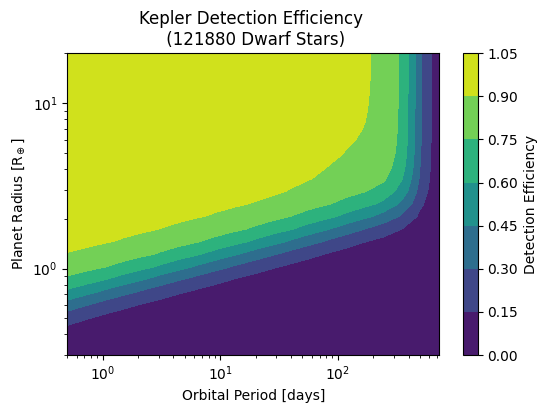

In [6]:
# Example: return the components and plot the detection efficiency
Pgrid, Rgrid, completeness, nstars, components = get_completeness(return_components=True) 
det_eff, vet_eff, fgeo = components

plt.figure(dpi=100)
plt.title('Kepler Detection Efficiency \n ({} Dwarf Stars)'.format(nstars))
plt.contourf(Pgrid, Rgrid, det_eff.T, cmap='viridis')
plt.colorbar(label='Detection Efficiency')
plt.xlabel('Orbital Period [days]')
plt.ylabel('Planet Radius [R$_\oplus$]')
plt.xscale('log')
plt.yscale('log')